In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
reeses=cv2.imread('C:/6-computer_vision/reeses_puffs.png',0)

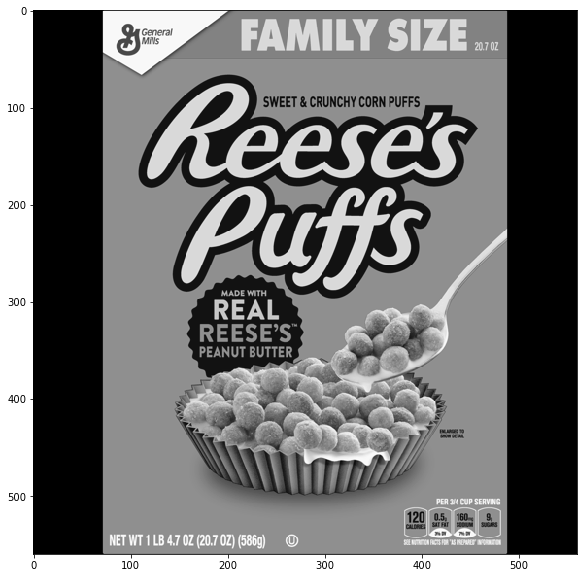

In [8]:
display(reeses)

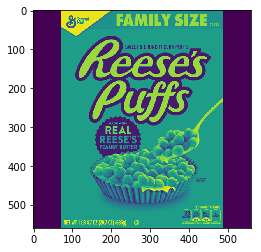

In [9]:
plt.imshow(reeses)

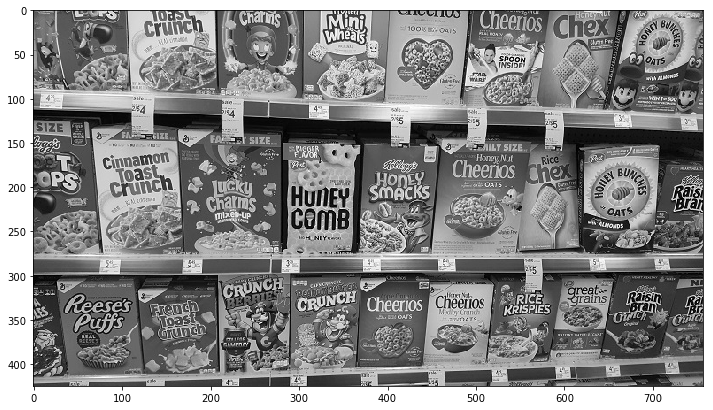

In [17]:
#whenever feature_engineering is there or u r working on it then u need to work in same work for all of them
cereals=cv2.imread('C:/6-Computer_Vision/many_cereals.jpg',0)
display(cereals)

In [15]:
orb=cv2.ORB_create()
#this line initialize the ORB (oriented FAST and rotated BRIEF)  detector,
#which is a feature detector and descriptor extractor

#find the keypoint and descriptors with ORB 
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

#orb.detectAndComputer() finds the keypoints(distinctive image features)
#and computers their descriptors ( a vector representing the key point in a high)
#kp1,and kp2 are lists of keypoints found in the reeses and cereals images,
#respectively
#des1 and des2 are the corresponding descripotors for these keypoints

#create BFMatcher object
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
#cv2.BFMatcher is the brute-force matcher object,
#which is used to match the descriptors between two images
#cv2.NORM_HAMMING specifies that the hamming distance
#should be used to comapre the descriptors (appropraiate for ORB)
#crossCheck=True ensures that  the matches are symmertic
#meaning that if a descriptors in reeses matches a descriptors in cereals,
#the reverse should be true

#match descriptors.
matches=bf.match(des1,des2)
#this line matches the descriptors from the two images.
#each match object contains information about the matching keypoints
#from both images.
#sort them in the order of their distance.
matches=sorted(matches,key=lambda x:x.distance)
#the matches are sorted based on the distance between the descriptors .
#shorter the the distance indicates better matches.

#draw 1st 25 matches
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
#cv2.drawMatches visualizes the 1st 25 matches by drawing lines between the matched keypoints in the two images.
#the result is stored in the reeses_matches variable.
#flag=2 is used to draw the matches without keypoints.

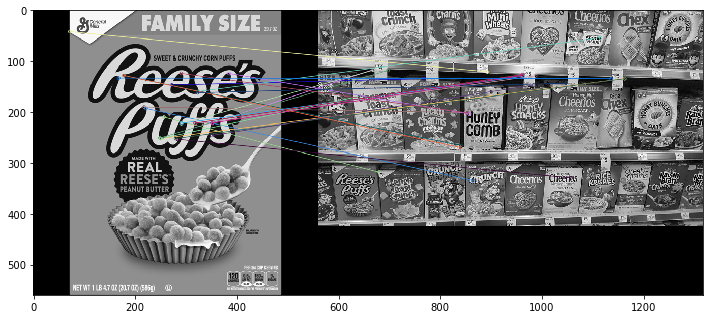

In [16]:
display(reeses_matches)

#bruteForce Matching with SIFT Descriptors and Ratio Test SIFT(Scale-Invariant Feature Transform)algorithm to detect and match features between two images(reeses and cereals)

In [30]:
#create SIFT Object 
sift=cv2.xfeatures2d.SIFT_create()
#this line initializes the SIFT detector,
#which is used for detecting keypoints and computing descriptors.
#SiFT is known for its robustness to changes in scale,rotation and illuminators
######################
#find the keypoints and descriptors with the Sift
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)
#sift.#create SIFT Object 
sift=cv2.xfeatures2d.SIFT_create()
#this line initializes the SIFT detector,
#which is used for detecting keypoints and computing descriptors.
#SiFT is known for its robustness to changes in scale,rotation and illuminators
######################
#find the keypoints and descriptors with the Sift
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)
#sift.detectAndCompute() deteects the keypoints and computes their corresponding descriptors for the 2 images
#kp1 and kp2 are keypoints detected in reeses and cereals ,resp.
#des1 and des2 are the descriptors associated with these keypoints.

#BFMatcher with default params
bf=cv2.BFMatcher()
#This line creates a Brute-Force matcher object with default parameters
#the BFMatcher matches descriptors between 2 images by finding the closest
matches=bf.knnMatch(des1,des2,k=2)
#bf.knnMatch() finds 2 best matches for each descriptor in des1
#(from rasess)by comparing thwm with all the descriptors in des2(from cereals)
#the k=2 parameter means that for each descriptor in des1,
#the 2 nearest neighbors (best matches ) in des2 are found.

#apply ratio test
good=[]
for match1,match2 in matches:
    if match1.distance <0.75*match2.distance:
        good.append([match1])
        
#the ratio test is used to filter out poor matches.
#it compares the distance of closest match(match1) to distance of 2nd closest match(match2)
#if the distance of match1 is less than 0.75 times the distance of match2,
#the match is considered the "good " and added to the good list,
#the ratio test helps eliminate false matches by ensuring that closest match is significantly better than 2nd closest.

#cv2.drawMatchesknn expects list of lists as matches.
sift=_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
#cv2.drawMatchesKnn() draws the matches between the keypoints of the 2 images.
#the good list is passed in as the matches from the ratio test.
#flags=2 draws the matches without drawing the keypoints themselves.

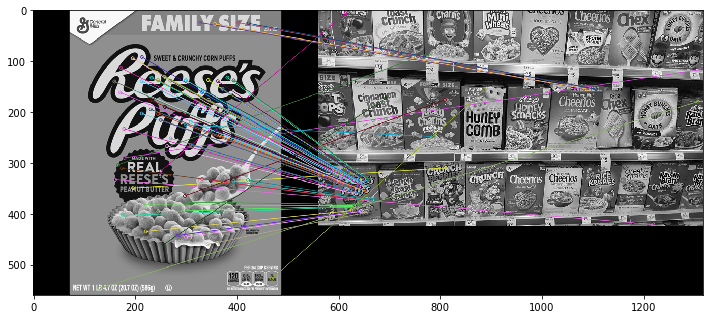

In [31]:
display(sift_matches)

FLann Based Matcher

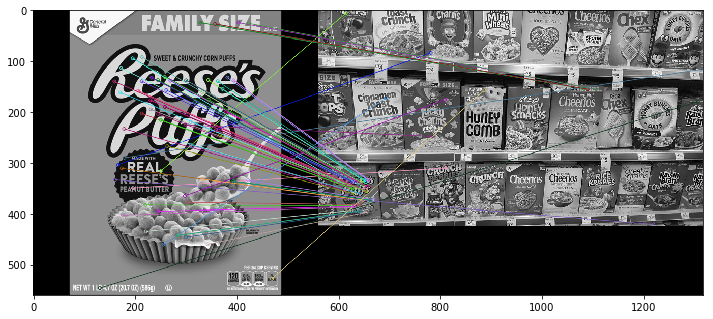

In [29]:
#create SIFT Object 
sift=cv2.xfeatures2d.SIFT_create()
#this line initializes the SIFT detector,
#which is used for detecting keypoints and computing descriptors.
#SiFT is known for its robustness to changes in scale,rotation and illuminators
######################
#find the keypoints and descriptors with the Sift
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)
#FLANN parameters
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)
flann=cv2.FlannBasedMatcher(index_params,search_params)
matches=flann.knnMatch(des1,des2,k=2)
    
#apply ratio test
good=[]
for i,(match1,match2) in enumerate(matches):
    if match1.distance <0.75*match2.distance:
        good.append([match1])
        
#the ratio test is used to filter out poor matches.
#it compares the distance of closest match(match1) to distance of 2nd closest match(match2)
#if the distance of match1 is less than 0.75 times the distance of match2,
#the match is considered the "good " and added to the good list,
#the ratio test helps eliminate false matches by ensuring that closest match is significantly better than 2nd closest.

#cv2.drawMatchesknn expects list of lists as matches.
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
#cv2.drawMatchesKnn() draws the matches between the keypoints of the 2 images.
#the good list is passed in as the matches from the ratio test.
display(flann_matches)